# Putting it all together

https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [2]:
pca = PCA()
pca

PCA()

In [3]:
logistic = LogisticRegression(max_iter=int(1e4), tol=0.1)
logistic

LogisticRegression(max_iter=10000, tol=0.1)

In [4]:
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe

Pipeline(steps=[('pca', PCA()),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

In [5]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [6]:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
param_grid

{'pca__n_components': [5, 15, 30, 45, 64],
 'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04])}

In [7]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 64]})

In [8]:
search.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 64]})

In [14]:
print(f"Best parameter (CV score: {search.best_score_:.3f})")
print(search.best_params_)

Best parameter (CV score: 0.920)
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


In [15]:
pca.fit(X_digits)

PCA()

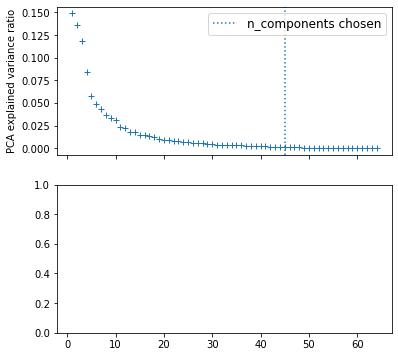

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
        pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
plt.show();

In [19]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [20]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


In [22]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
lfw_people

{'data': array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
          86.666664],
        [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
         133.66667 ],
        [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
         183.      ],
        ...,
        [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
          44.666668],
        [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
         166.33333 ],
        [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
          61.      ]], dtype=float32),
 'images': array([[[254.      , 254.      , 251.66667 , ...,  65.333336,
           50.666668,  40.333332],
         [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,
           52.      ,  42.666668],
         [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,
           49.      ,  42.      ],
         ...,
         [ 74.333336,  54.      ,  31.666666, ...,  97.666664,
     

In [23]:
n_samples, h, w = lfw_people.images.shape


In [24]:
X = lfw_people.data
n_features = X.shape[1]


In [25]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


In [26]:

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [28]:
n_components = 150


In [29]:

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 966 faces
done in 0.105s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.009s


In [30]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 13.239s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [31]:

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Predicting people's names on the test set
done in 0.048s
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.46      0.55        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.96      0.75      0.84        36

         accuracy                           0.85       322
        macro avg       0.87      0.72      0.77       322
     weighted avg       0.86      0.85      0.84       322

[[  6   2   0   5   0   0   0]
 [  2  52   0   6   0   0   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   4   0   2   1   8   0]
 [  1   1   2   5   0   0  27]]


In [32]:

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


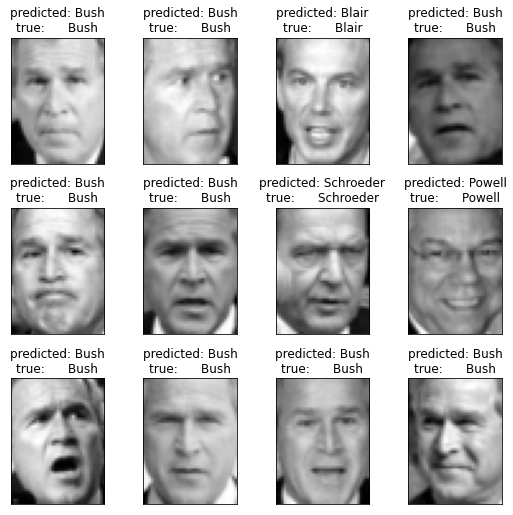

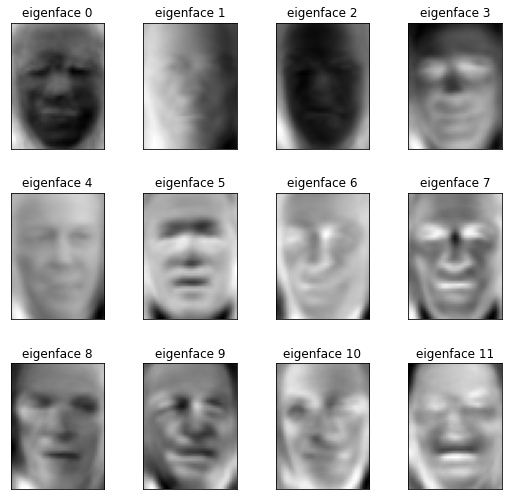

In [33]:

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()